In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_data_loaders(train_batch_size, test_batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    temp = torch.tensor(np.random.randint(0, 10, (len(trainset),)))
    trainset.targets = temp.tolist()
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

    return trainloader, testloader

In [3]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1) 
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 4 * 4, 120)  
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = self.bn1(x)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = self.bn2(x)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = self.bn3(x)
        x = x.view(-1, 64 * 4 * 4)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [4]:
def train_single_epoch(model, train_loader, optimizer, criterion):
    model.train()
    total_train_loss = 0.0
    actual_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        actual_train += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = 100 * actual_train / total_train
    return avg_train_loss, train_accuracy

In [5]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_test_loss = 0.0
    total_correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            total_test_loss += criterion(outputs, labels).item()
            preds = outputs.argmax(dim=1, keepdim=True)
            total_correct += preds.eq(labels.view_as(preds)).sum().item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_accuracy = 100. * total_correct / len(test_loader.dataset)
    return avg_test_loss, test_accuracy

In [6]:
def log_epoch_results(epoch, avg_train_loss, avg_test_loss):
    print(f'Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

In [7]:
def train_and_evaluate_model(model, train_loader, test_loader, optimizer, criterion, epochs=20):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        avg_train_loss, train_accuracy = train_single_epoch(model, train_loader, optimizer, criterion)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        avg_test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(avg_test_loss)
        test_accuracies.append(test_accuracy)

        log_epoch_results(epoch, avg_train_loss, avg_test_loss)

    return train_losses, test_losses, train_accuracies, test_accuracies

In [8]:
loss_func = nn.CrossEntropyLoss()

In [9]:
model_1 = CNN_Model()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
train_loader_1, test_loader_1 = get_data_loaders(500, 500)
train_losses_batch_1, test_losses_batch_1, train_accuracies_batch_1, test_accuracies_batch_1 = train_and_evaluate_model(model_1, train_loader_1, test_loader_1, optimizer, loss_func)
batch_params_model_1 = torch.nn.utils.parameters_to_vector(model_1.parameters())

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Train Loss: 2.3199, Test Loss: 2.3065
Epoch 2, Train Loss: 2.2959, Test Loss: 2.3177
Epoch 3, Train Loss: 2.2756, Test Loss: 2.3165
Epoch 4, Train Loss: 2.2443, Test Loss: 2.3392
Epoch 5, Train Loss: 2.1924, Test Loss: 2.3735
Epoch 6, Train Loss: 2.1192, Test Loss: 2.4193
Epoch 7, Train Loss: 2.0229, Test Loss: 2.5086
Epoch 8, Train Loss: 1.9167, Test Loss: 2.5973
Epoch 9, Train Loss: 1.8006, Test Loss: 2.7238
Epoch 10, Train Loss: 1.6824, Test Loss: 2.8715
Epoch 11, Train Loss: 1.5643, Test Loss: 2.9934
Epoch 12, Train Loss: 1.4513, Test Loss: 3.0947
Epoch 13, Train Loss: 1.3486, Test Loss: 3.4028
Epoch 14, Train Loss: 1.2422, Test Loss: 3.6273
Epoch 15, Train Loss: 1.1467, Test Loss: 3.7468
Epoch 16, Train Loss: 1.0604, Test Loss: 3.9073
Epoch 17, Train Loss: 0.9840, Test Loss: 4.1329
Epoch 18, Train Loss: 0.9027, Test Loss: 4.4267
Epoch 19, Train Loss: 0.8281, Test Loss: 4.6409
Epoch 20, Train Loss:

In [10]:
model_2 = CNN_Model()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
train_loader_2, test_loader_2 = get_data_loaders(300, 300)
train_losses_batch_2, test_losses_batch_2, train_accuracies_batch_2, test_accuracies_batch_2 = train_and_evaluate_model(model_2, train_loader_2, test_loader_2, optimizer, loss_func)
batch_params_model_2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Train Loss: 2.3201, Test Loss: 2.3065
Epoch 2, Train Loss: 2.2982, Test Loss: 2.3136
Epoch 3, Train Loss: 2.2854, Test Loss: 2.3281
Epoch 4, Train Loss: 2.2608, Test Loss: 2.3333
Epoch 5, Train Loss: 2.2179, Test Loss: 2.3714
Epoch 6, Train Loss: 2.1512, Test Loss: 2.4158
Epoch 7, Train Loss: 2.0563, Test Loss: 2.5038
Epoch 8, Train Loss: 1.9450, Test Loss: 2.6161
Epoch 9, Train Loss: 1.8237, Test Loss: 2.7391
Epoch 10, Train Loss: 1.6954, Test Loss: 2.9253
Epoch 11, Train Loss: 1.5727, Test Loss: 3.0438
Epoch 12, Train Loss: 1.4522, Test Loss: 3.2750
Epoch 13, Train Loss: 1.3441, Test Loss: 3.4463
Epoch 14, Train Loss: 1.2361, Test Loss: 3.7426
Epoch 15, Train Loss: 1.1400, Test Loss: 3.9190
Epoch 16, Train Loss: 1.0502, Test Loss: 4.1443
Epoch 17, Train Loss: 0.9712, Test Loss: 4.3485
Epoch 18, Train Loss: 0.8963, Test Loss: 4.6552
Epoch 19, Train Loss: 0.8344, Test Loss: 4.9310
Epoch 20, Train Loss:

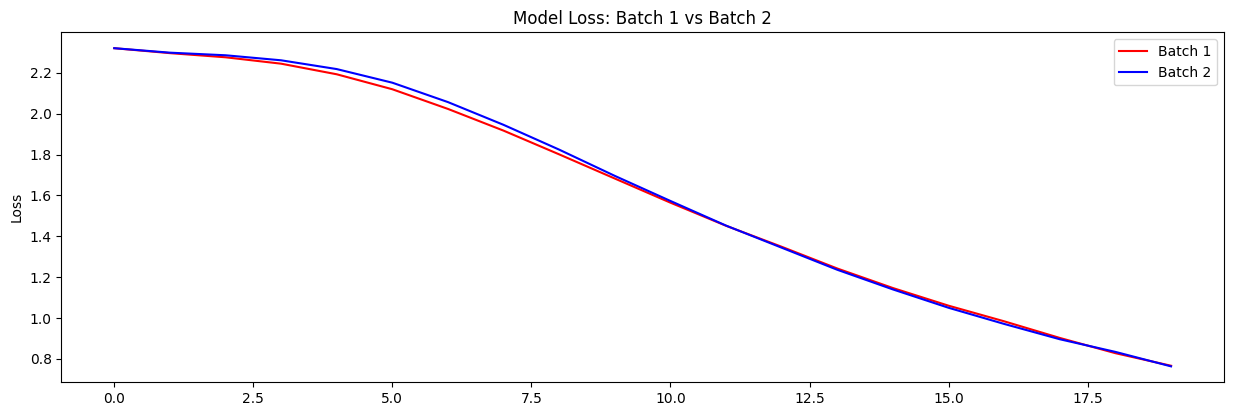

In [11]:
epoch_arr = np.arange(0, 20, 1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(epoch_arr, train_losses_batch_1, color="r", label='Batch 1')
plt.plot(epoch_arr, train_losses_batch_2, color="b", label='Batch 2')
plt.title('Model Loss: Batch 1 vs Batch 2')
plt.ylabel('Loss')
plt.legend()


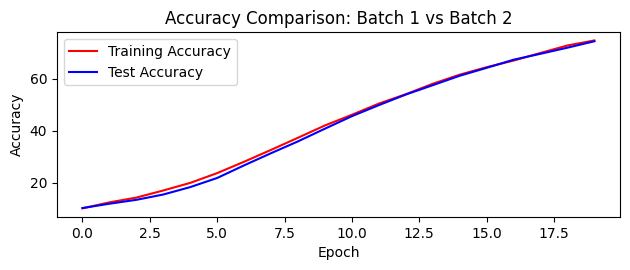

In [12]:
# Plot for accuracy comparison
plt.subplot(2, 1, 2)
plt.plot(epoch_arr, train_accuracies_batch_1, color="r", label='Training Accuracy')
plt.plot(epoch_arr, train_accuracies_batch_2, color="b", label='Test Accuracy')
plt.title('Accuracy Comparison: Batch 1 vs Batch 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
def compute_metrics_for_loss(model, train_loader, test_loader, loss_func):
    def compute(loader):
        correct = 0
        total = 0
        cost_sum = 0
        cost_counter = 0
        with torch.no_grad():
            for data, target in loader:
                output = model(data)
                cost = loss_func(output, target)
                cost_sum += cost
                cost_counter += 1
                correct += (torch.argmax(output, dim=1) == target).sum().item()
                total += target.size(0)
        return cost_sum / cost_counter, round(correct / total, 3)

    train_loss, train_acc = compute(train_loader)
    test_loss, test_acc = compute(test_loader)
    return train_loss, train_acc, test_loss, test_acc

In [14]:
train_loss_alpha = []
test_loss_alpha = []
train_accuracy_alpha = []
test_accuracy_alpha = []

alpha_values = np.linspace(0, 10, num = 150)
theta_values =[]
theta_values = (1 - alpha_values[:, np.newaxis]) * batch_params_model_1.detach().numpy() + alpha_values[:, np.newaxis] * batch_params_model_2.detach().numpy()

for i in range(len(theta_values)):
    thetac = (1 - alpha_values[i]) * batch_params_model_1 + alpha_values[i] * batch_params_model_2
    model = CNN_Model()  
    torch.nn.utils.vector_to_parameters(thetac, model.parameters())

    temp = [torch.numel(param) for param in model.parameters()]

    train_loss, train_acc, test_loss, test_acc = compute_metrics_for_loss(model, train_loader_1, test_loader_1, loss_func)
    train_loss_alpha.append(train_loss)
    train_accuracy_alpha.append(train_acc)
    test_loss_alpha.append(test_loss)
    test_accuracy_alpha.append(test_acc)

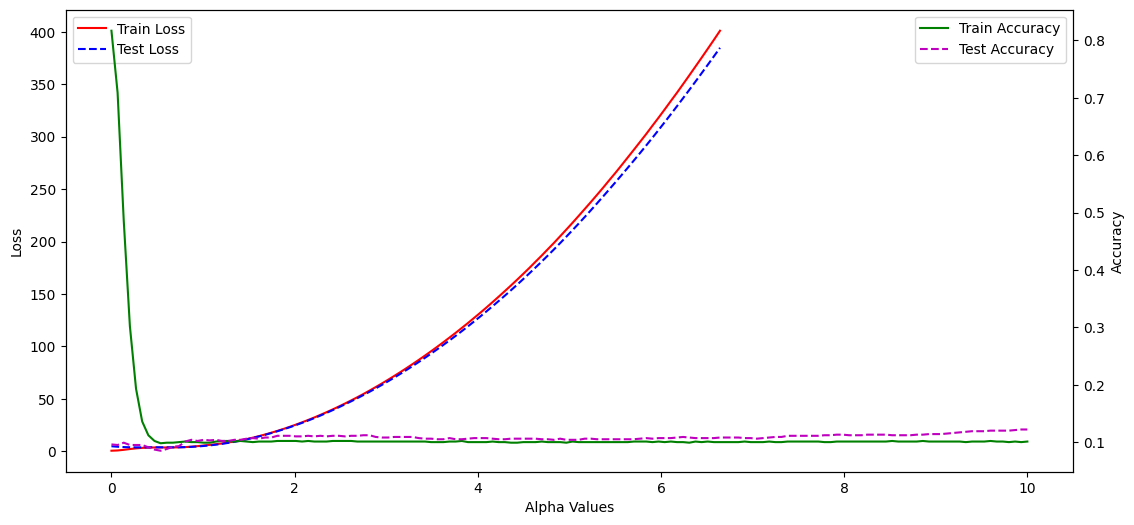

In [15]:
plt.figure(figsize=(13, 6))
plt.plot(alpha_values[:100], train_loss_alpha[:100], color="r", label="Train Loss")
plt.plot(alpha_values[:100], test_loss_alpha[:100], color="b", linestyle='--', label="Test Loss")
plt.xlabel("Alpha Values")
plt.ylabel("Loss", color="black")
plt.tick_params(axis='y', labelcolor="black")
plt.legend(loc="upper left")

plt.twinx()

plt.plot(alpha_values, train_accuracy_alpha, color="g", label="Train Accuracy")
plt.plot(alpha_values, test_accuracy_alpha, color="m", linestyle='--', label="Test Accuracy")
plt.ylabel("Accuracy", color="black")
plt.tick_params(axis='y', labelcolor="black")
plt.legend(loc="upper right")

plt.show()